summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_narrow_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5_no_merge.hdf5
summary_stats | 09/24/2025 04:59:47 PM | Rank 0 | INFO  |  loading from L2_hmfs_0.5

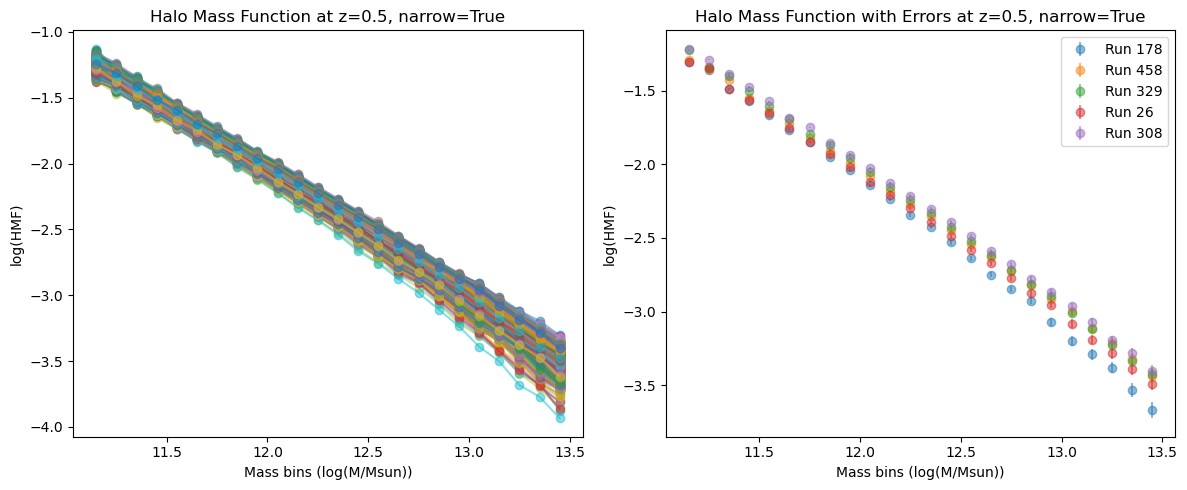

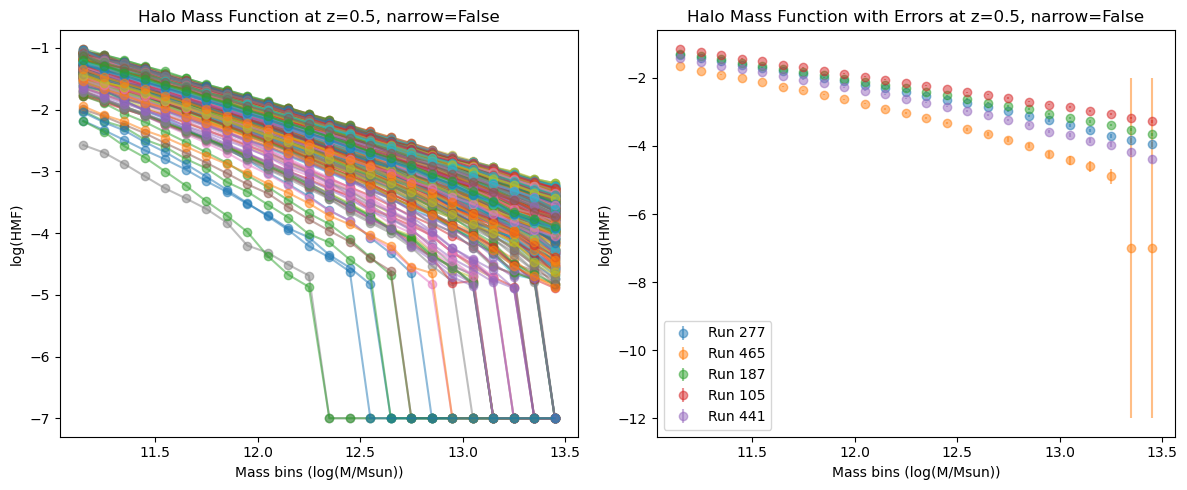

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from gal_goku import summary_stats

data_dir = f'/home/qezlou/HD2/HETDEX/cosmo/data/'
mass_range = (11.1, 13.5)

for narrow in [True, False]:
    hmf = summary_stats.HMF(data_dir, fid='L2', z=0.5, narrow=narrow, mass_range=mass_range)
    mbins, log_hmfs, log_hmfs_errs, _, _ =hmf.get_wt_err()
    mbins.shape, log_hmfs.shape, log_hmfs_errs.shape

    fig, ax = plt.subplots(1,2, figsize=(12, 5))
    
    for i in range(log_hmfs.shape[0]):
        ax[0].plot(mbins, log_hmfs[i], label=f'Run {i+1}', alpha=0.5, marker='o', linestyle='-')
    ax[0].set_xlabel('Mass bins (log(M/Msun))')
    ax[0].set_ylabel('log(HMF)')
    ax[0].set_title(f'Halo Mass Function at z=0.5, narrow={narrow}')

    ind_rand = np.random.randint(0, log_hmfs.shape[0], size=5)
    for i in ind_rand:
        ax[1].errorbar(mbins, log_hmfs[i], yerr=log_hmfs_errs[i], label=f'Run {i+1}', alpha=0.5, marker='o', linestyle='None')
    ax[1].set_xlabel('Mass bins (log(M/Msun))')
    ax[1].set_ylabel('log(HMF)')
    ax[1].set_title(f'Halo Mass Function with Errors at z=0.5, narrow={narrow}')
    ax[1].legend()
    fig.tight_layout()

In [ ]:
# I ran HMFs in two chunks and now I want to merge them

import h5py
import numpy as np

    
# Get paths for the files
chunk1_file = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/L2_hmfs_0.5_no_merge_chunk1.hdf5'
chunk0_file = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/L2_hmfs_0.5_no_merge_chunk0.hdf5'
output_file = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/L2_hmfs_0.5_no_merge.hdf5'



with h5py.File(output_file, 'w') as fout:
    with h5py.File(chunk0_file, 'r') as f0:
        with h5py.File(chunk1_file, 'r') as f1:
                print(f'{f0.keys()}')
                for key in ['bins_coarse', 'hmfs_coarse']:
                     data = []
                     for f in [f0, f1]:
                         for d in f[key]:
                             data.append(d)
                     dtype = h5py.special_dtype(vlen=data[0].dtype)
                     fout.create_dataset(key, data=data, dtype=dtype)
                for key in['bad_sims','sim_tags']:
                    data = []
                    for f in [f0, f1]:
                        for d in f[key]:
                            data.append(d.decode('utf-8'))
                    fout.create_dataset(key, data=data, dtype=h5py.string_dtype(encoding='utf-8'))
    

with h5py.File(output_file, 'r') as f:
    for key in f.keys():
        print(f'{key}: {f[key].shape}')

<KeysViewHDF5 ['bad_sims', 'bins_coarse', 'hmfs_coarse', 'sim_tags']>
bad_sims: (3,)
bins_coarse: (493,)
hmfs_coarse: (493,)
sim_tags: (493,)


496